In [76]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Sigmoid (Logistic) Function

For classification tasks, one can start using a linear regression model (i.e. $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$), to predict $y$ for a given $x$. However, the linear regression model will fail to predict the output variable $y$ to be either $0$ or $1$, used for the classification purposes. This can be accomplished by using a "sigmoid function" which maps all input values to values between $0$ and $1$. 

The formula for a sigmoid function is given as follows: 

$$g(z) = \frac{1}{1+e^{-z}} \nonumber$$

In the case of logistic regression, $z$ (the input to the sigmoid function), is the output of the linear regression model.

- In the case of a single dataset, $z$ is scalar.
- in the case of multiple datasets, $z$ may be a vector consisting of $m$ values, one for each dataset. 

The `sigmoid` function is implemented as shown below.

In [77]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
    g = 1.0/(1.0+np.exp(-z))
   
    return g

# Logistic Regression

A logistic regression model applies the sigmoid function to the linear regression model as follows:

$$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \nonumber $$ 

 where $g(\mathbf{z})$ is defined as:

 $$g(\mathbf{z}) = \frac{1}{1+e^{-\mathbf{z}}} \nonumber$$
 
 with
 
 $$\mathbf{z} = \mathbf{w} \cdot \mathbf{x} + b $$

# Decision Boundary in Logestic Regession
  
One can interpret the output of the model ($f_{\mathbf{w},b}(\mathbf{x})$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.

Therefore, to get a final prediction ($y = 0$ or $y = 1$) from the logistic regression model, one can use the following heuristic:

- if $f_{\mathbf{w},b}(x) >= 0.5$, predict $y=1$
  
- if $f_{\mathbf{w},b}(x) < 0.5$, predict $y=0$
  
  
If we plot the sigmoid function we can see that for $z >=0$, $g(z) >= 0.5$ and for $z < 0$, $g(z) < 0.5$. 

* Therefore, for a logistic regression model where $\mathbf{z} = \mathbf{w} \cdot \mathbf{x} + b$:

  if $\mathbf{w} \cdot \mathbf{x} + b >= 0$, the model predicts $y=1$
  
  if $\mathbf{w} \cdot \mathbf{x} + b < 0$, the model predicts $y=0$
  

Text(0.5, 0, 'z')

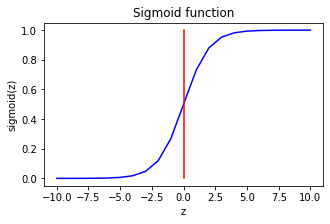

In [78]:
# Plot sigmoid(z) over a range of values from -10 to 10
z = np.arange(-10,11)

fig,ax = plt.subplots(1,1,figsize=(5,3))
# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")
ax.plot([0.0, 0.0], [0.0, 1.0], c="r")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

# Logistic Loss Function

Recall that for **Linear** Regression we have used the **squared error cost function**. The squared error cost function had the nice property that following the derivative of the cost leads to the minimum. While this cost function works well for linear regression, in logestic regression $f_{wb}(x)$ has a non-linear component (i.e. the sigmoid function $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b )$). Therefore, logistic regression requires a cost function more suitable to its non-linear nature. This can be defined as a **loss function** as follows:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$} \nonumber
  \end{cases}
\end{equation}

where $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point with:


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ denotes the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$, where $g$ is the sigmoid function.

The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or ($y=0$) and another for when the target is one ($y=1$). Combining these curves provides a behavior that is useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target. Consider these two curves, the cost function for the logistic regression forms as follows:

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \nonumber $$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point given as:

$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \nonumber$$
    
Note that $m$ is the number of training examples in the data set and:

\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)}) \nonumber \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b \nonumber \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}} \nonumber 
\end{align}


The algorithm for `compute_logistic_loss` loops over all the examples calculating the loss for each example and accumulating the total.

Note that the variables X and y are not scalar values but matrices of shape ($m, n$) and ($𝑚$,) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.


In [79]:
def compute_logistic_loss(X, y, w, b):
    """
    Computes logestic loss

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      loss (scalar): loss
    """

    m = X.shape[0]
    loss = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        loss +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    loss = loss / m
    return loss


# Gradient Descent for Logistic Regression

Recall the gradient descent algorithm utilizes the gradient calculation as follows:

\begin{align*}
w_j &= w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \qquad \forall j = 0, \dots, n-1 \nonumber \\ 
b &= b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \nonumber \\
\end{align*}

Where at each iteration we perform simultaneous updates on $w_j$ for all $j$, where

\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \nonumber \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \nonumber 
\end{align*}

where

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    and $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    
The codes for the gradient descent are given below:

In [80]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_dw, dj_db  

In [81]:
# Gradient decent method
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, rel_err):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha
    Args:
        X (ndarray (m,n): Data, m examples with n features
        y (ndarray (m,)): target values
        w_in (ndarray (n,)) : initial model parameters
        b_in (scalar): initial model parameter
        alpha (float): learning rate
        num_iters (int): number of iterations to run gradient descent
        rel_err(float): relative error in the gradient decent
    Returns:
        w (scalar): Updated value of parameter after running gradient descent
        b (scalar): Updated value of parameter after running gradient descent
        J_history (List): History of cost values
    """
    # Initialize
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    b         = b_in
    w         = w_in
    rel_diff  = 1.0
    i         = 0
    
    # Loop over number of iterations
    while (i < num_iters) or (rel_diff > rel_err):

        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = compute_gradient_logistic(X, y, w, b)
        
        # Update Parameters using equation for the gradient decent
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save cost J at each iteration
        if i < 100000: # prevent resource exhaustion
            J_history.append(compute_logistic_loss(X, y, w, b))
        
        # Relative difference
        if i > 0:
            rel_diff = abs(J_history[i]-J_history[i-1])/J_history[i]
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Itr {i:4}: Cost = {J_history[-1]:8.9f}, rel_diff = {rel_diff:0.9e}")
        
        # Update
        i += 1
        
    # return w and J,w history for graphing
    print(f"Itr {i:4}: Cost = {J_history[-1]:8.9f}, rel_diff = {rel_diff:0.9e}")
    return w, b, J_history

# Run an Example using in-house Logestic Gradient Descent

In [82]:
def main():
    
    # dataset
    X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
    y_train = np.array([0, 0, 0, 1, 1, 1])

    # initialize parameters
    w_init = np.zeros_like(X_train[0])
    b_init = 0.0

    # some gradient descent settings
    num_iters = 10000
    alpha     = 1.0e-1
    rel_err   = 1.0e-2
    
    # run gradient descent
    w_final, b_final, J_hist = gradient_descent(X_train, y_train, w_init, b_init, alpha, num_iters, rel_err)
    print(f"(J, w, b) found by gradient descent: ({J_hist[-1]:0.7f}, {w_final}, {b_final:0.7f})")
    print("--------------------------------------------------------------------")
    # reference parameters: w:[5.28 5.08], b:-14.222409982019837

if __name__ == '__main__':
    main()

Itr    0: Cost = 0.684610469, rel_diff = 1.000000000e+00
Itr 1000: Cost = 0.159097767, rel_diff = 8.535521413e-04
Itr 2000: Cost = 0.084600642, rel_diff = 4.781698964e-04
Itr 3000: Cost = 0.057053273, rel_diff = 3.282283690e-04
Itr 4000: Cost = 0.042907594, rel_diff = 2.489516787e-04
Itr 5000: Cost = 0.034338477, rel_diff = 2.001970148e-04
Itr 6000: Cost = 0.028603798, rel_diff = 1.672708979e-04
Itr 7000: Cost = 0.024501570, rel_diff = 1.435756908e-04
Itr 8000: Cost = 0.021423703, rel_diff = 1.257221998e-04
Itr 9000: Cost = 0.019030137, rel_diff = 1.117949719e-04
Itr 10000: Cost = 0.017117769, rel_diff = 1.006414383e-04
(J, w, b) found by gradient descent: (0.0171178, [5.28123029 5.07815608], -14.2224100)
--------------------------------------------------------------------


# Run the same example using Scikit-Learn Logistic Regression

In [83]:
# dataset
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

# call logestic regression model
lr_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
# fit the model
lr_model.fit(X_train, y_train)

# make prediction
y_pred = lr_model.predict(X_train)
print("Prediction on training set:", y_pred)
# y_train = np.array([0, 0, 0, 1, 1, 1])

# calculate accuracy
print("Accuracy on training set:", lr_model.score(X_train, y_train))

Prediction on training set: [0 0 0 1 1 1]
Accuracy on training set: 1.0
